# Day 09 - Smoke Basin

## Part 1
Find low points by checking all adjacent numbers

In [208]:
import numpy as np
import functools
# import pandas as pd

In [209]:
with open("09_input.txt", "r") as f:
    full_data = f.readlines()

test_data = """
2199943210
3987894921
9856789892
8767896789
9899965678
""".splitlines()[1:]

In [210]:
def parse_input(input_data):
    raw_data = [[int(i) for i in line.strip()]
            for line in input_data]  
    return np.asarray(raw_data)  

In [211]:
def calculate_basin_risk(input_data):
    data = parse_input(input_data)
    risk_map = np.zeros(shape=data.shape, dtype=np.int8)
    padded_data = np.pad(data, 1, constant_values=10)
    
    for row in range(1, data.shape[0]+1):
        for column in range(1, data.shape[1]+1):
            core = padded_data[row, column]
            kernel = padded_data[row-1:row+2, column-1:column+2]
            is_minima = (
                core < kernel[0, 1] and
                core < kernel[1, 0] and
                core < kernel[1, 2] and
                core < kernel[2, 1]
            )
            if is_minima:
                risk_map[row-1, column-1] = core +1
    return np.sum(risk_map)

In [212]:
calculate_basin_risk(test_data)

15

In [213]:
calculate_basin_risk(full_data)

425

## Part 2
Get the three biggest basins.

### Visualizing the Basin walls and low-points

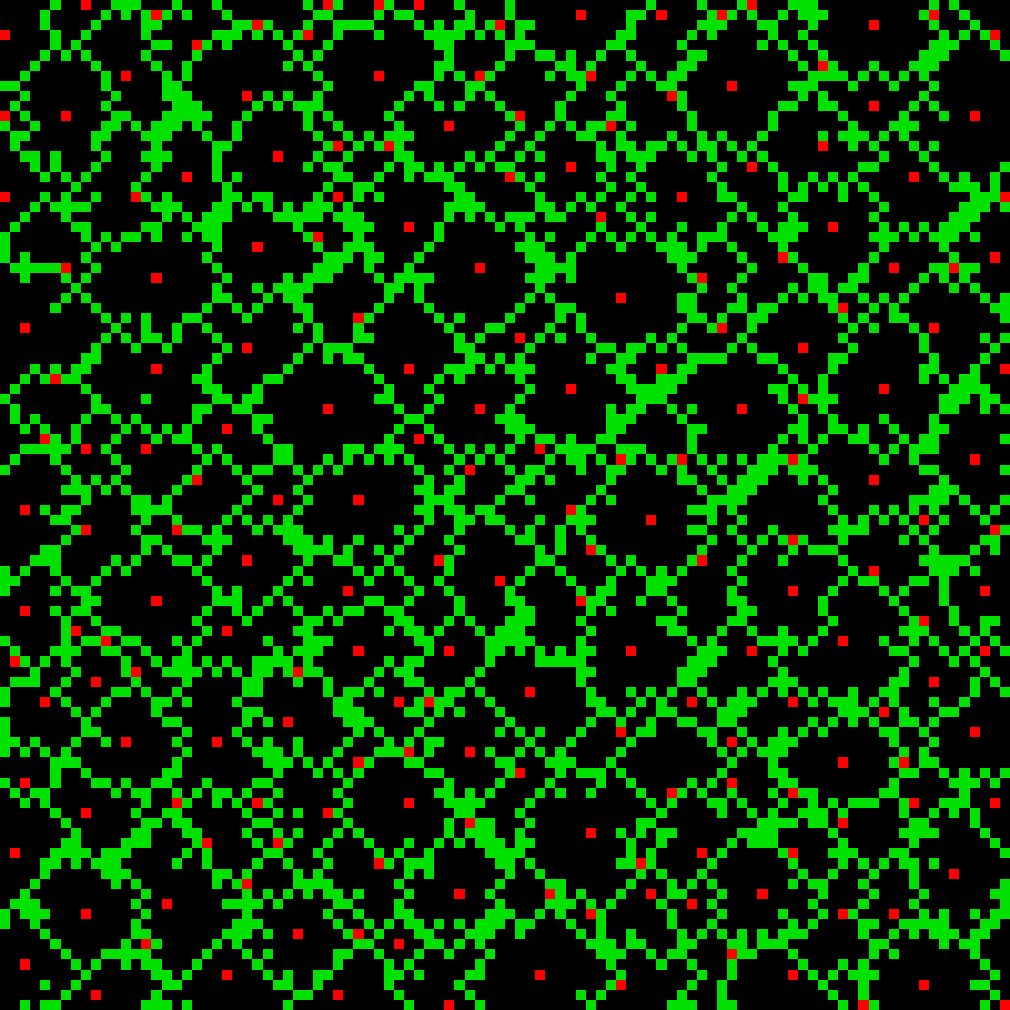

In [214]:
from PIL import Image, ImageDraw, ImageChops

def visualize_basin(input_data):
    data = parse_input(input_data)
    risk_map = np.zeros(shape=data.shape, dtype=np.int8)
    padded_data = np.pad(data, 1, constant_values=10)
    
    im = Image.fromarray(np.uint8(padded_data) * 25)
    # display(im.resize((1010, 1010), resample=Image.BOX))


    for row in range(1, data.shape[0]+1):
        for column in range(1, data.shape[1]+1):
            core = padded_data[row, column]
            kernel = padded_data[row-1:row+2, column-1:column+2]
            is_minima = (
                core < kernel[0, 1] and
                core < kernel[1, 0] and
                core < kernel[1, 2] and
                core < kernel[2, 1]
            )
            if is_minima:
                risk_map[row-1, column-1] = core +1

    only_max_data = np.array([[(item==9)*9 for item in line]
                              for line in data])
    
    # reduced_data = np.copyto(only_max_data, risk_map)
    im1 = Image.fromarray(
        np.array(
            [[[0,i*25,0] for i in line]
            for line in only_max_data],
            dtype=np.uint8
        ), 
        mode="RGB"
    )
    
    im2 = Image.fromarray(
        np.array(
            [[[255,0,0] if i else [0,0,0] for i in line]
            for line in risk_map],
            dtype=np.uint8
        ), 
        mode="RGB"
    )
    
    im3 = ImageChops.add(im1, im2)
    
    display(im3.resize((1010, 1010), resample=Image.BOX))
    


visualize_basin(full_data)

### The actual riddle
1. Get Basin Positions
2. For each basin
   1. get adjacent pixels
   2. add them to size count if not 9
3. Sort basins by size and take the 3 largest


In [215]:
def get_basin_positions(padded_data):
    padded_basin_positions = []
    
    # Check the ranges again!
    for row in range(1, padded_data.shape[0]-1):
        for column in range(1, padded_data.shape[1]-1):
            core = padded_data[row, column]
            kernel = padded_data[row-1:row+2, column-1:column+2]
            is_minima = (
                core < kernel[0, 1] and
                core < kernel[1, 0] and
                core < kernel[1, 2] and
                core < kernel[2, 1]
            )
            if is_minima:
                padded_basin_positions.append((row, column))
    
    return padded_basin_positions

In [216]:
def visit_neighbours(data, position, visited):
    if position in visited:
        return 0
    
    count = 0
    x, y = position
    value = data[x, y]
    visited.add(position)
    
    if value < 9:
        # print(f"Visiting point {x} {y} with value {value}")
        count += 1
        count += visit_neighbours(data, (x, y-1), visited)
        count += visit_neighbours(data, (x-1, y), visited)
        count += visit_neighbours(data, (x+1, y), visited)
        count += visit_neighbours(data, (x, y+1), visited)
    
    return count

In [219]:
def explore_basins(input_data):
    data = parse_input(input_data)
    padded_data = np.pad(data, 1, constant_values=10)
    
    basin_points = get_basin_positions(padded_data)
    basin_sizes = []
    
    for point in basin_points:
        size = visit_neighbours(padded_data, point, set())
        basin_sizes.append(size)
        
    basin_sizes.sort(reverse=True)
    result = functools.reduce(lambda a,b: a*b, basin_sizes[:3])
    return result

In [221]:
explore_basins(test_data)

1134

In [222]:
explore_basins(full_data)

1135260